# Data analysis with giotto-time plotting tools

In this example we will analyse S&P GSCI Kansas Wheat Index, which is an important agricultural price indicator, for the last 10 years. We'll show how trends and seasonality can be analysed with giotto-time plotting tools.

## Imports and setups

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.plotting import seasonal_plot, seasonal_subplots, lag_plot, acf_plot

## Data setup

### Loading data

In [2]:
df_sp = pd.read_csv('https://storage.googleapis.com/l2f-open-models/giotto-time/examples/data/^GSPC.csv')
df_sp = pd.read_csv('WheatTr.csv', sep='\t')
df_column = df_sp.set_index('Effective date ')['S&P GSCI Kansas Wheat']

### Converting to a Giotto time series

First, the initial time series has to be converted to a periodic indexed format and fill the missing values for non-trading days.

In [3]:
df_column.index = pd.to_datetime(df_column.index)
time_series_preparation = TimeSeriesPreparation(output_name='Wheat price index')
period_index_time_series = time_series_preparation.transform(df_column)
df = period_index_time_series.resample('D').fillna(method='ffill')

Apart from index values, we would also analyse its changes in for of log-returns. Log-returns are selected so that the aggregation can be done by a simple sum of returns for the period.

In [4]:
returns = (np.log(df / df.shift(1))).dropna()
returns.columns = ['Wheat price returns']

## Exploratory data analysis

First, we can see that the index was decreasing for most of the period but there is no clearn trends in returns or their volatility.

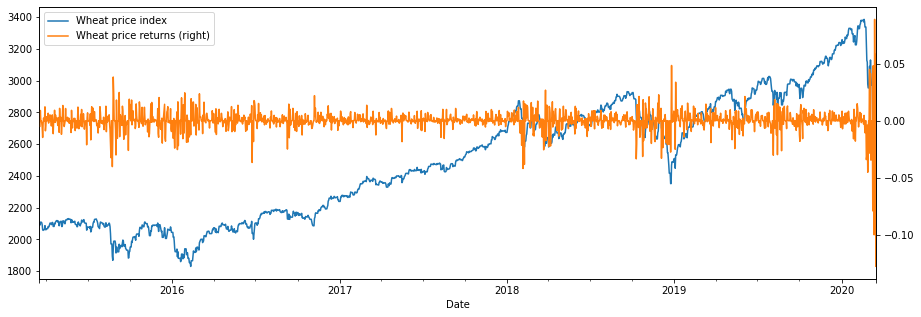

In [5]:
ax = df.plot(figsize=(15, 5))
ax = returns.plot(ax=ax, secondary_y=True)

### Seasonality

Since agriculture is a seasonal industry, a seasonal plot with annual seasonality might help us discover some patterns:

/Users/semyonburyachenko/Documents/Upwork/Giotto/venv/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


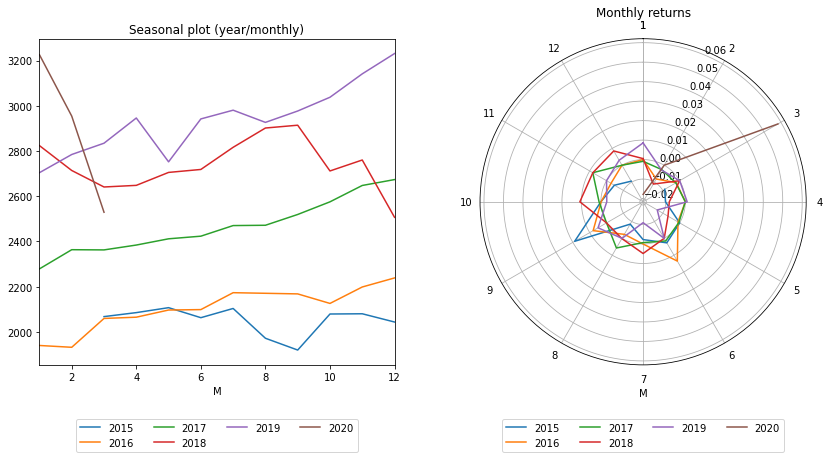

In [6]:
fig = plt.figure(figsize=(14, 6))
m1 = fig.add_subplot(121, title='Seasonal plot (year/monthly)')
seasonal_plot(df, 'year', freq='M', agg='last', ax=m1)
m2 = fig.add_subplot(122, projection='polar')
seasonal_plot(returns, 'year', freq='M', agg='last', ax=m2, polar=True)
m2.set_title('Monthly returns');

We can see that the prices are more volatile in the middle of the year, which can be even better observed on a polar plot of the returns.

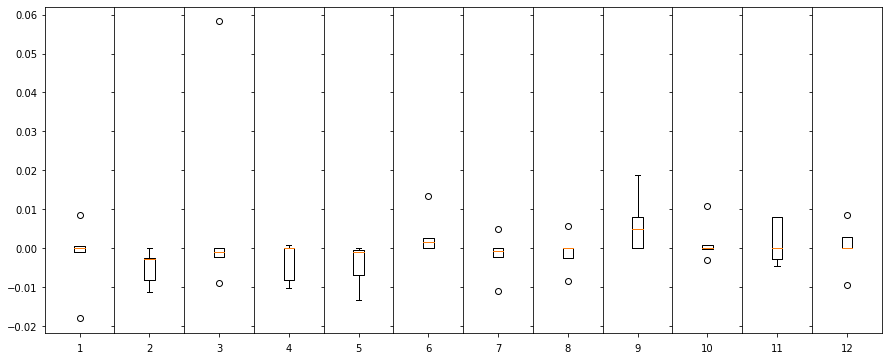

In [13]:
seasonal_subplots(returns, 'year', 'M', agg='last', box=True);

Seasonal subplots also show that summer (and expecially June) returns are much more volatile than the other.

### Autocorrelation

Lag plots are a good tool to analyse autocorrelation as well as seasonality. Here we can see that there's a significant autocorrelation between index values, even for 30-day lags, however it becomes less visible compared to the values 1 year ago:

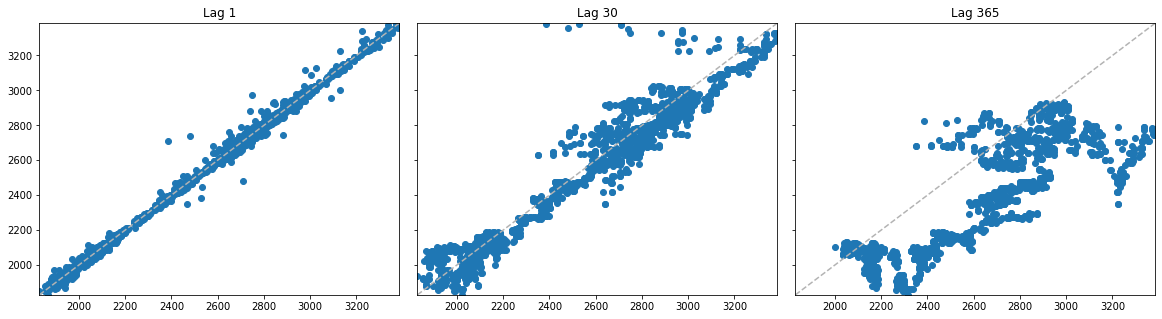

In [8]:
lag_plot(df, lags=[1, 30, 365]);

However, the returns are much more random and lag plots for different lags look very similar.

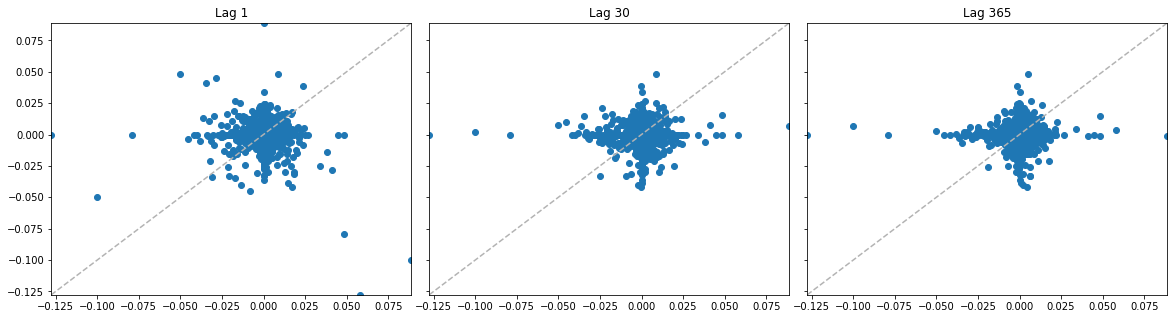

In [9]:
lag_plot(returns, lags=[1, 30, 365]);

Autocorrelation plots confirm this observation, showing a very persistent autocorrelation between index values but PACF is not significant after lag 1.

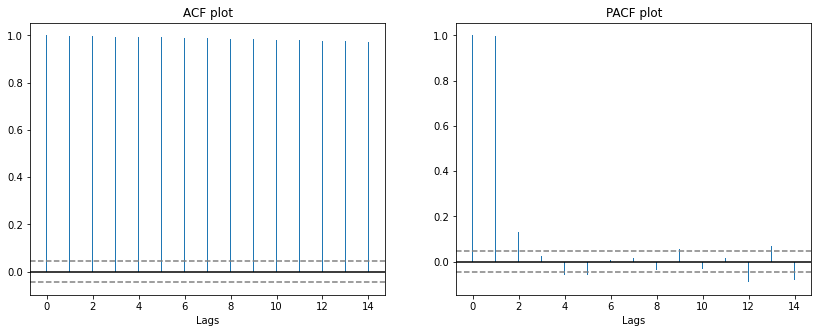

In [10]:
fig = plt.figure(figsize=(14, 5))
a1 = fig.add_subplot(121, title='ACF plot')
acf_plot(df, max_lags=15, ax=a1)
a2 = fig.add_subplot(122, title='PACF plot')
acf_plot(df, max_lags=15, ax=a2, partial=True);

The returns show no significant autocorrelation and look like a white noise process.

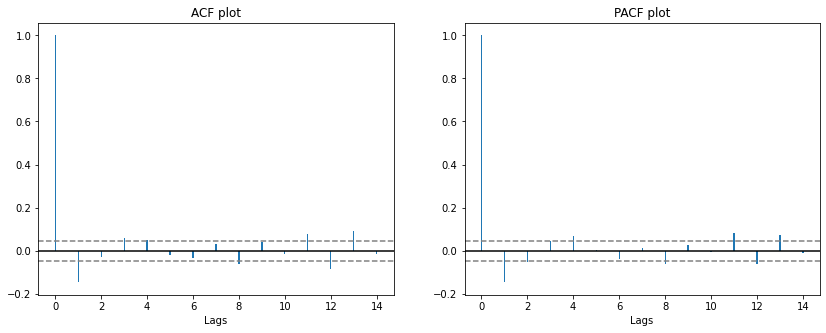

In [11]:
fig = plt.figure(figsize=(14, 5))
a1 = fig.add_subplot(121, title='ACF plot')
acf_plot(returns, max_lags=15, ax=a1)
a2 = fig.add_subplot(122, title='PACF plot')
acf_plot(returns, max_lags=15, ax=a2, partial=True);